# Determination of the critical micelle concentration of Sodium dodecyl sulfate (SDS) in water
Example of a nonlinear curve fit of Surfactant Conductivity Data
The fit functions are based on the "APN"-model for the concentration of surfactants near the cmc

More details on our web page
http://www.usc.es/fotofqm/en/units/single-molecule-fluorescence/concentration-model-surfactants-near-cmc

A Model for Monomer and Micellar Concentrations in Surfactant Solutions. Application to Conductivity, NMR, Diffusion and Surface Tension data
Wajih Al-Soufi, Lucas Piñeiro, Mercedes Novo, Journal of Colloid and Interface Science 2012, 370, 102–110 DOI: 10.1016/j.jcis.2011.12.037
 
Wajih Al-Soufi, 2018, Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License

Python code based on "Simple nonlinear least squares curve fitting in Python", http://www.walkingrandomly.com/?p=5215

V1 - 2018/04/18

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.special as sc

### Conductivity data:
xdata: Total Surfactant concentration [S]0(mM)
ydata: Surfactant Conductivity Data κ (uS/cm)

In [2]:
xdata = np.array([0.00, 0.20, 0.40, 0.69, 0.79, 0.98, 1.17, 1.27, 1.46, 1.64, 1.92, 2.11, 2.29, 2.38, 2.65, 2.92, 3.10, 3.27, 3.70, 4.21, 4.55, 4.95, 5.36, 5.75, 6.14, 6.52, 6.90, 7.26, 7.63, 7.98, 8.12, 8.26, 8.33, 8.47, 8.61, 8.68, 8.81, 9.02, 9.35, 9.74, 10.06, 10.32, 10.63, 10.94, 11.24, 11.54, 12.12, 12.74, 13.24, 13.77, 14.29, 14.79, 15.28, 15.75, 16.22, 16.67, 17.11, 17.99, 18.75, 19.51, 20.24, 20.93, 21.59, 22.22, 22.83, 23.40, 23.99, 24.33, 24.70, 25.00])
ydata = np.array([3.5, 18.7, 38.3, 59.9, 67.6, 85, 97.1, 107.6, 116, 131.8, 150.2, 165.1, 179.5, 185.9, 207, 224, 239, 249, 275, 312, 343, 376, 394, 428, 452, 482, 507, 533, 555, 576, 582, 589, 593, 601, 605, 609, 616, 623, 633, 646, 656, 664, 673, 683, 691, 698, 715, 733, 744, 760, 774, 788, 801, 814, 826, 837, 850, 874, 896, 917, 937, 957, 978, 992, 1008, 1025, 1043, 1057, 1067, 1074])

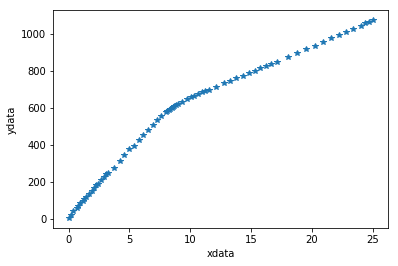

In [3]:
plt.plot(xdata,ydata,'*')
plt.xlabel('xdata')
plt.ylabel('ydata');

### Function definition "APN"-Model
#### APNS1(cS0,cmc,r)
Takes [S]0 and calculates the monomeric concentration [S1] as function of the cmc and the relative transition width r 

In [4]:
def APNS1(cS0,cmc,r):
    s0 = cS0/cmc;
    pi = math.pi;
    A=2/(1+np.sqrt(2/pi)*r*np.exp(-1/(2*r*r))+sc.erf(1/np.sqrt(2)/r));
    cS1=cmc*(1-(A/2)*(np.sqrt(2/pi)*r*np.exp(-(s0-1)**2/(2*r*r))+(s0-1)*(sc.erf((s0-1)/(np.sqrt(2)*r))-1)));    
    return cS1

#### APNConductivity(cS0,cmc,r,a,b,c)
Takes [S]0 and calculates the electric conductivity κ as function of the cmc, the relative transition width r, the slopes a and b, and the solvent conductivity c = κs.

In [5]:
def APNConductivity(cS0,cmc,r,a,b,c):
    cS1 = APNS1(cS0, cmc, r)
    cSm = cS0 - cS1       
    return a * cS1 + b * cSm + c

### Nonlinear curve fit
#### Initial parameter values (cmc,r,a,b,c)

In [6]:
p0=(8.0,0.1,70.0,30.0,10.0)

In [7]:
popt, pcov = curve_fit(APNConductivity, xdata, ydata,p0) # fit
psd = np.sqrt(np.diagonal(pcov)) # calculate parameter standard deviations
print(popt) # optimized parameter values
print(psd) # parameter standard deviations

[  8.18798535   0.12737425  72.54979584  27.72754611  10.73056648]
[ 0.03828131  0.00908576  0.26777009  0.09614226  0.88426139]


#### Results

In [8]:
print('cmc = %0.4g ± %0.2g'%(popt[0],psd[0]), '\nr = %0.4g ± %0.2g'%(popt[1],psd[1]))

cmc = 8.188 ± 0.038 
r = 0.1274 ± 0.0091


In [9]:
residuals = ydata - APNConductivity(xdata,*popt)
fres = sum(residuals**2)
fres #Sum of squared residuals

432.14136281923504

#### Plot result

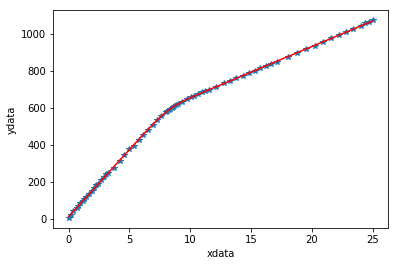

In [10]:
curvex=np.linspace(xdata[0],xdata[-1],100)
curvey=APNConductivity(curvex,*popt)
plt.plot(xdata,ydata,'*')
plt.plot(curvex,curvey,'r')
plt.xlabel('xdata')
plt.ylabel('ydata');

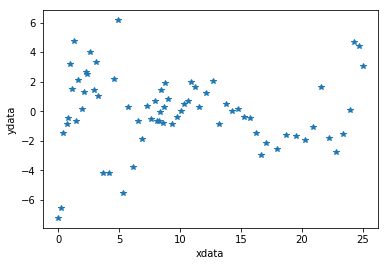

In [11]:
plt.plot(xdata,residuals,'*')
plt.xlabel('xdata')
plt.ylabel('ydata');